# K-means Clustering using Elbow methods

# Step 1: import the necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Prepare the data

In [41]:
# load the data
df = pd.read_csv('Customers.csv')

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


* Use `df.iloc[:,[3, 4]].values` when you need a NumPy array for direct plotting or compatibility with libraries that require NumPy arrays.
* Use `df.iloc[:,[3, 4]]` when you want to preserve the DataFrame structure and use Pandas' built-in plotting functions or other DataFrame operations.

In [66]:
# Selecting the features for clustering
X = df.iloc[:,[3, 4]].values

In [68]:
X[:5,:]

array([[15000,    39],
       [35000,    81],
       [86000,     6],
       [59000,    77],
       [38000,    40]], dtype=int64)

# Step 3: Elbow method
* n_clusters=i: Specifies the number of clusters (K) for the current iteration.
* init='k-means++': Indicates that the initialization method for cluster
centroids is the k-means++ algorithm, which selects initial cluster centers
in a smart way to speed up convergence.
* max_iter=300: Specifies the maximum number of iterations for each
KMeans run.
* n_init=10: Specifies the number of times the KMeans algorithm will be run
with different centroid seeds. The best result will be chosen based on
inertia.
* random_state=0: Sets the random seed for reproducibility.
## After fitting the KMeans model, the inertia attribute (`kmeans.inertia_`) is accessed, which represents the WCSS value for the current value of K. This value is then added to the wcss list.

In [48]:
wcss = [] # Initialize an empty list WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    #  Fit the KMeans model to the data X
    kmeans.fit(X)
    # Calculate and append WCSS to the wcss list
    wcss.append(kmeans.inertia_)

# Step 4: Plot the elbow method
Plot the WCSS values against the number of clusters to visualize the elbow point,\
which helps determine the optimal number of clusters.

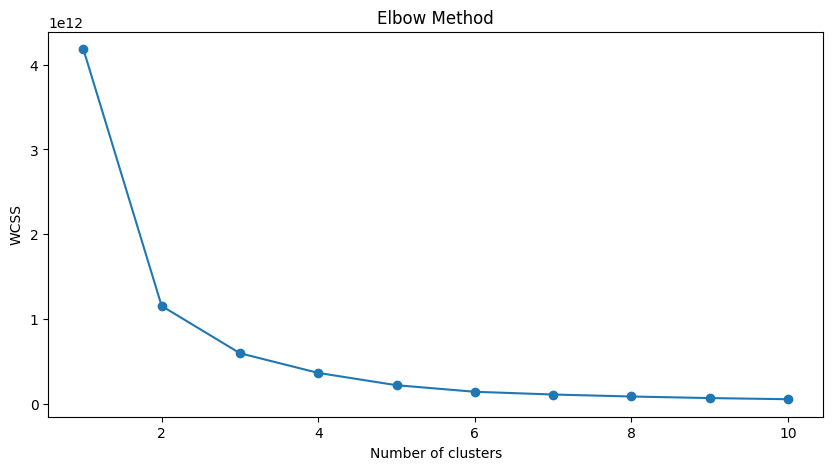

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The location of this "elbow" point indicates the optimal number of clusters. In this example, the plot shows a clear bend at K=5, suggesting that 5 clusters may be the optimal choice for clustering the given dataset. 

# Step 5: Apply K-means Clustering with Optimal Number of Clusters

In [76]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [77]:
# Here label contains the clusters labels for each data point
label = kmeans.predict(X)
 
print(len(label))

2000


In [54]:
print(np.unique(label))

[0 1 2 3 4]


# Step 6: Visualize the Clusters

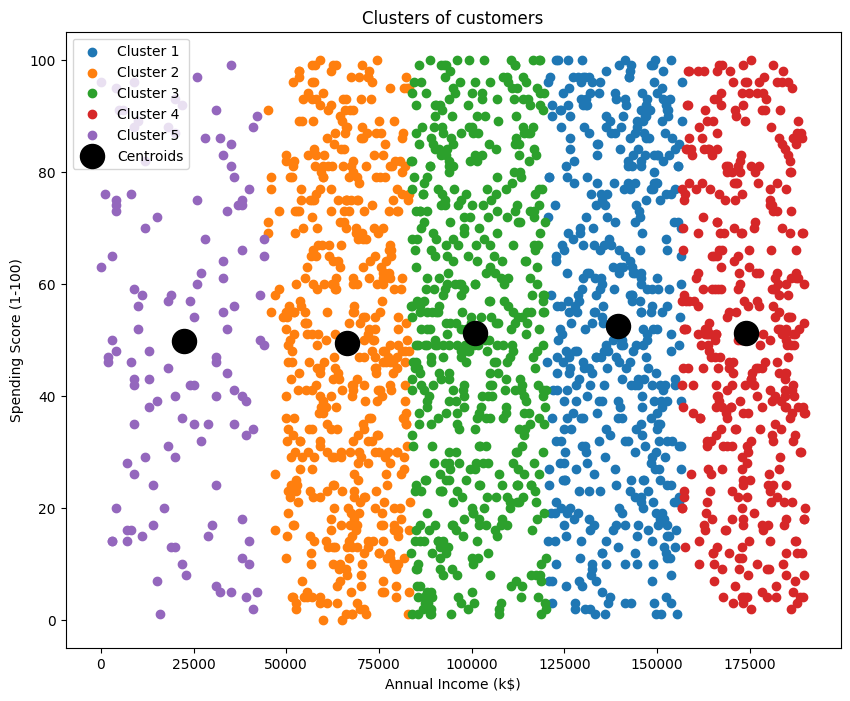

In [78]:
plt.figure(figsize=(10,8))

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = f'Cluster {i+1}')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This visualization provides insight into how customers are grouped based on their
annual income and spending score. It helps in understanding the distribution of
customers among different segments (clusters) and the characteristics of each
segment.